# 手写识别的例子

In [3]:
from sklearn import datasets
import numpy as np

In [2]:
digita = datasets.load_digits()
X = digita.data
y = digita.target

In [4]:
nosiy_digits = X + np.random.normal(0, 4, size=X.shape)

In [5]:
import matplotlib.pyplot as plt

In [6]:
example_digits = nosiy_digits[y==0, :][:10]
for num in range(1, 10):
    X_num = nosiy_digits[y==num, :][:10]
    example_digits = np.vstack([example_digits, X_num])

In [7]:
example_digits.shape

(100, 64)

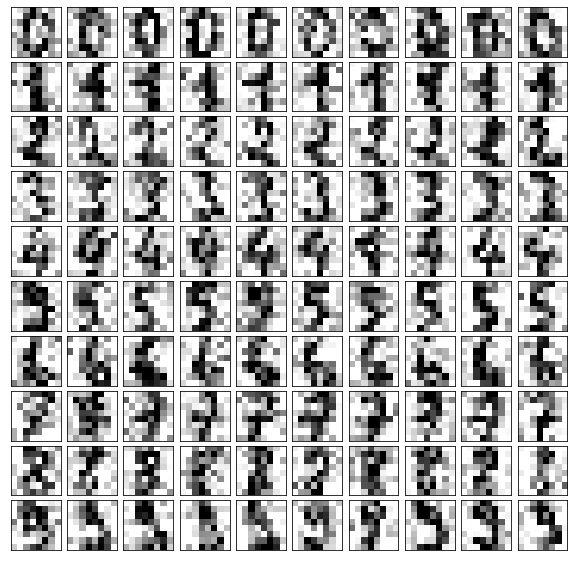

In [8]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

    plt.show()
    
plot_digits(example_digits)

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(0.5)

In [11]:
pca.fit(nosiy_digits)

PCA(n_components=0.5)

In [12]:
pca.n_components_

12

In [13]:
components = pca.transform(example_digits)

In [14]:
filtered_digits=pca.inverse_transform(components)

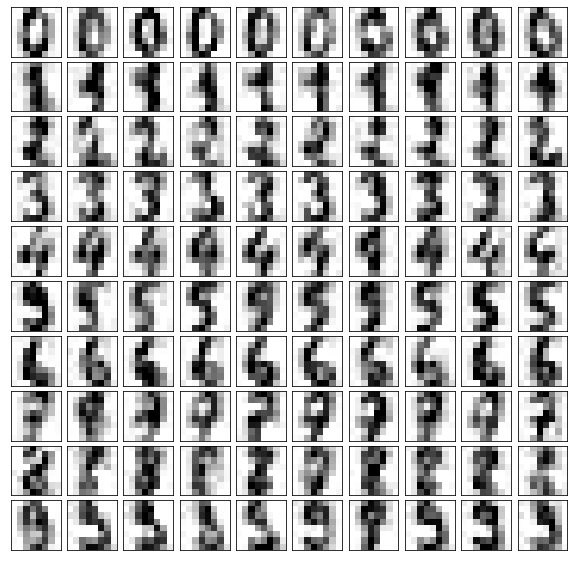

In [15]:
plot_digits(filtered_digits)

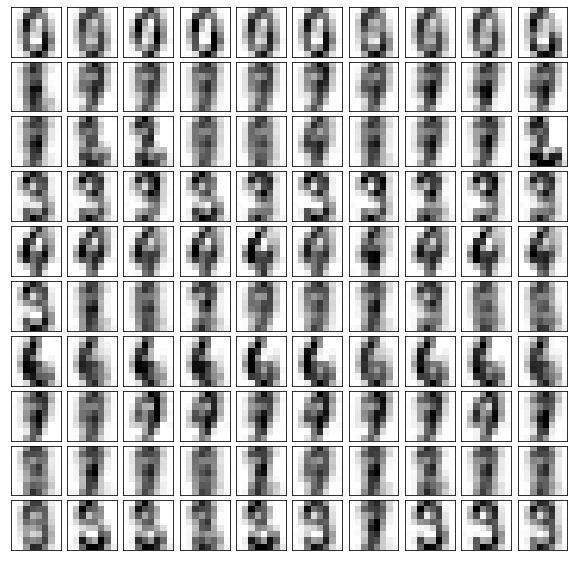

In [16]:
pca = PCA(0.2)
pca.fit(nosiy_digits)
components = pca.transform(example_digits)
filtered_digits=pca.inverse_transform(components)
plot_digits(filtered_digits)